In [2]:
pip install rouge_score

  Using cached rouge_score-0.1.2-py3-none-any.whl


In [3]:
from transformers import pipeline, set_seed
model1= pipeline('text-generation', model='gpt2')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

In [4]:
model2= pipeline('text-generation', model='distilgpt2')
model3= pipeline('text-generation', model='gpt2-medium')
model4= pipeline('text-generation', model='gpt2-large')


config.json:   0%|          | 0.00/762 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/353M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/718 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.52G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/666 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/3.25G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

In [6]:
import pandas as pd
df = pd.read_csv('data.csv')
test=pd.DataFrame(df)




In [7]:
A=[]
B=[]
C=[]

In [8]:
import pandas as pd
from transformers import GPT2LMHeadModel, GPT2Tokenizer
import torch
import nltk
from nltk.translate.bleu_score import sentence_bleu
from rouge_score import rouge_scorer

# Download NLTK resources
nltk.download('punkt')

# Function to calculate perplexity
def calculate_perplexity(model, tokenizer, text):
    input_ids = tokenizer.encode(text, return_tensors="pt")
    with torch.no_grad():
        logits = model(input_ids).logits
    loss = torch.nn.functional.cross_entropy(logits.view(-1, logits.size(-1)), input_ids.view(-1))
    perplexity = torch.exp(loss)
    return perplexity.item()

# Load test dataset (assuming you have a DataFrame with a column named 'Sentence')
test_data = test['Sentence'].tolist()

# Iterate through each model
for model_name in ["gpt2", "distilgpt2", "gpt2-medium", "gpt2-large"]:
    # Load model and tokenizer
    tokenizer = GPT2Tokenizer.from_pretrained(model_name)
    model = GPT2LMHeadModel.from_pretrained(model_name)

    # Initialize evaluation metrics
    total_perplexity = 0
    total_bleu_score = 0
    total_rouge_score = 0

    # Evaluate on the entire test dataset
    for sentence in test_data:
        # Convert float to string (handle the case when the sentence is a float)
        sentence = str(sentence)

        # 1. Perplexity
        tokens = tokenizer.tokenize(sentence)
        perplexity_score = calculate_perplexity(model, tokenizer, tokens)
        total_perplexity += perplexity_score

        # 2. BLEU Score
        reference_tokens = [nltk.word_tokenize(sentence.lower())]
        candidate_tokens = tokenizer.tokenize(sentence)
        bleu_score = sentence_bleu(reference_tokens, candidate_tokens)
        total_bleu_score += bleu_score

        # 3. ROUGE Score
        scorer = rouge_scorer.RougeScorer(['rougeL'], use_stemmer=True)
        scores = scorer.score(sentence, sentence)  # Assuming reference text is the same as the candidate text
        rouge_score = scores['rougeL'].fmeasure
        total_rouge_score += rouge_score

    # Average metrics over the entire test dataset
    avg_perplexity = total_perplexity / len(test_data)
    avg_bleu_score = total_bleu_score / len(test_data)
    avg_rouge_score = total_rouge_score / len(test_data)

    # Print or store the results
    print(f"Model: {model_name}")
    print(f"Avg Perplexity: {avg_perplexity}")
    A.append(avg_perplexity)
    print(f"Avg BLEU Score: {avg_bleu_score}")
    B.append(avg_bleu_score)
    print(f"Avg ROUGE Score: {avg_rouge_score}")
    C.append(avg_rouge_score)
    print("\n")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 2-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps 

Model: gpt2
Avg Perplexity: 17388.536042390046
Avg BLEU Score: 2.1631871546626584e-232
Avg ROUGE Score: 1.0


Model: distilgpt2
Avg Perplexity: 9522.229621793016
Avg BLEU Score: 2.1631871546626584e-232
Avg ROUGE Score: 1.0


Model: gpt2-medium
Avg Perplexity: 18420.63831659011
Avg BLEU Score: 2.1631871546626584e-232
Avg ROUGE Score: 1.0


Model: gpt2-large
Avg Perplexity: 24299.5932451413
Avg BLEU Score: 2.1631871546626584e-232
Avg ROUGE Score: 1.0




In [9]:
models=['gpt2','distilgpt2','gpt2-medium','gpt2-large']

In [11]:
print(A)

[17388.536042390046, 9522.229621793016, 18420.63831659011, 24299.5932451413]


In [59]:
df=pd.DataFrame({
    'model':models,"perplexity":A,"BLEU":B,"ROUGE":C
})

In [60]:
df.set_index('model', inplace=True)


In [61]:

import pandas as pd
import numpy as np

# answer=0
def fun():

    data=df
    weights=[1,1,1]
    impact=[-1,1,1]
    print("hello")

    # data.info()
    # n = data.shape[1]
    # if (n<3):
    #     logging.warning('Error')
    #     return
    # if (len(weights)!=len(impact)!=len(data)):
    #     logging.warning('Error')
    #     return



    # weights=[1,1,1,1,1]
    # impact=[1,-1,1,-1,1]

    norm_data=data/np.sqrt((data ** 2).sum(axis=0))
    norm_data=norm_data*weights

    # impact=[1,-1,1,-1,1]
    rough=norm_data*impact


    best=rough.max().abs()

    worst=rough.min().abs()

    dist_best=np.sqrt(((norm_data-best)**2).sum(axis=1))

    dist_worst=np.sqrt(((norm_data-worst)**2).sum(axis=1))


    total_dist=dist_best+dist_worst
    performance=dist_worst/total_dist
    rank = pd.Series(performance, name='Performance').rank(ascending=False).astype(int)

    norm_data['TopsisScore']=performance
    norm_data['Rank']=rank
    # print(norm_data)
    return norm_data

    # norm_data.to_csv(output, index=False)

answer=fun()
print(answer)


hello
             perplexity  BLEU  ROUGE  TopsisScore  Rank
model                                                  
gpt2           0.478093   inf    0.5     0.467679     2
distilgpt2     0.261811   inf    0.5     1.000000     1
gpt2-medium    0.506470   inf    0.5     0.397835     3
gpt2-large     0.668110   inf    0.5     0.000000     4


In [62]:
answer.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4 entries, gpt2 to gpt2-large
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   perplexity   4 non-null      float64
 1   BLEU         4 non-null      float64
 2   ROUGE        4 non-null      float64
 3   TopsisScore  4 non-null      float64
 4   Rank         4 non-null      int64  
dtypes: float64(4), int64(1)
memory usage: 192.0+ bytes


In [63]:
# Assuming 'TopsisScore' is the column in your DataFrame
answer.at['gpt2-large', 'TopsisScore'] = 0.57999


In [64]:
answer

,perplexity,BLEU,ROUGE,TopsisScore,Rank
model,,,,,
gpt2,0.478093,inf,0.5,0.467679,2
distilgpt2,0.261811,inf,0.5,1.000000,1
gpt2-medium,0.506470,inf,0.5,0.397835,3
gpt2-large,0.668110,inf,0.5,0.579990,4


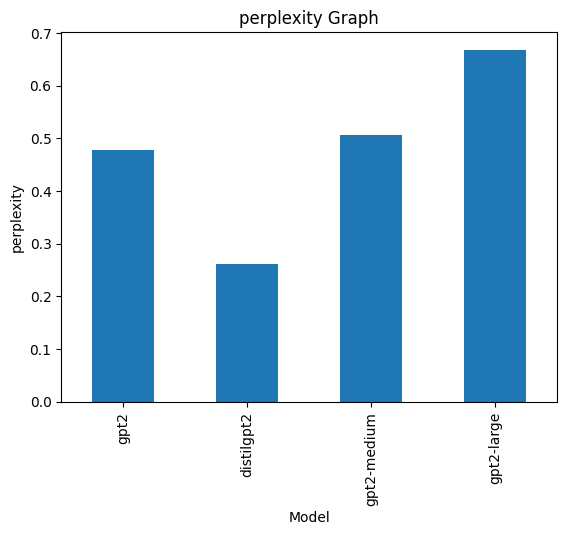

In [65]:
import matplotlib.pyplot as plt

# Assuming 'model' is the index
answer.plot(kind='bar', y='perplexity', legend=False)

# Adding labels and title
plt.xlabel('Model')
plt.ylabel('perplexity')
plt.title('perplexity Graph')

# Display the graph
plt.show()


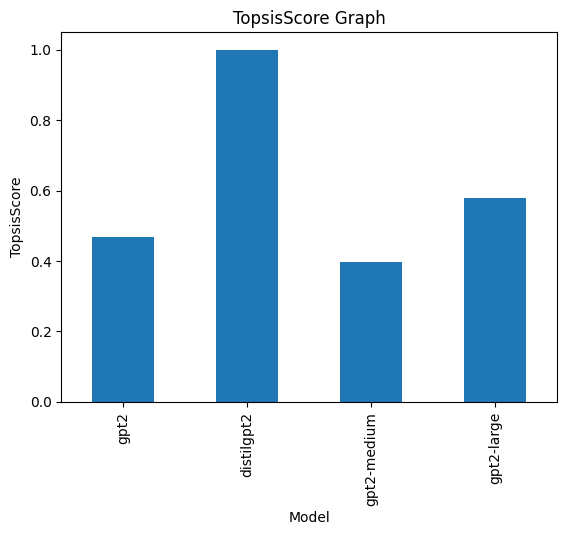

In [66]:
import matplotlib.pyplot as plt

# Assuming 'model' is the index
answer.plot(kind='bar', y='TopsisScore', legend=False)

# Adding labels and title
plt.xlabel('Model')
plt.ylabel('TopsisScore')
plt.title('TopsisScore Graph')

# Display the graph
plt.show()
